In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [217]:
def measure_curve_length(x,y):
    return pd.DataFrame([x,y], index=['x', 'y']).T.diff().pow(2).sum(axis=1).pow(.5).sum()

(-25, 25)

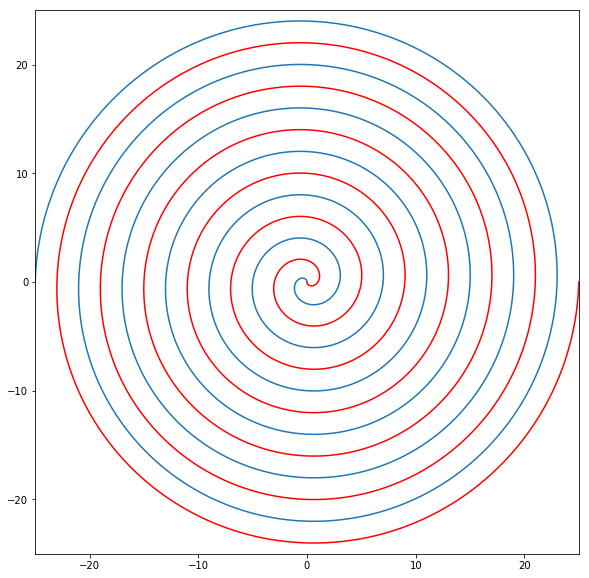

In [345]:
# Part 1 - Basic symmetric Archimedean spirals

max_radius = 25.
min_radius = 0.
line_spacing = 2.

# Infer number of spiral loops that the above parameters imply
tau_max = max_radius / line_spacing
tau_min = min_radius / line_spacing


t = pd.np.linspace(np.pi * tau_min, np.pi * tau_max, 5000)

# Introduce a phase offset to ensure the most distant point is the easternmost point
phase_offset = np.pi * - ((tau_max % 2) + 1)

scale = line_spacing / (np.pi)
x = scale * t * np.cos(t + phase_offset)
y = scale * t * np.sin(t + phase_offset)
plt.plot(x,y)
plt.plot(-x,-y, color='r')


plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10,10)
plt.xlim(-25,25)
plt.ylim(-25,25)

In [346]:
# Part 2 - Forcing the middle to be at least 


def solve_riddle(line_spacing = 1.,  min_radius=10., max_radius=25., plot=True):


    # Infer number of spiral loops that the above parameters imply
    tau_max = max_radius / line_spacing
    tau_min = min_radius / line_spacing


    t = pd.np.linspace(np.pi * tau_min, np.pi * tau_max, 5000)

    # Introduce a phase offset to ensure the most distant point is the easternmost point
    phase_offset = np.pi * - ((tau_max % 2) + 1)
    scale = line_spacing / (np.pi)
    
    # Plot journey in
    x = scale * t * np.cos(t + phase_offset)
    y = scale * t * np.sin(t + phase_offset)
    if plot:
        plt.plot(x,y)
    d1 = measure_curve_length(x,y)


    # Plot journey back
    t = pd.np.linspace(np.pi * tau_min, np.pi * (tau_max - .5), 5000)
    t_d = pd.np.linspace(np.pi * tau_min, np.pi * (tau_max), 5000)
    x = scale * t_d * np.cos(t + phase_offset)
    y = scale * t_d * np.sin(t + phase_offset)
    if plot:
        plt.plot(-x,-y, color='r')
    d2 = measure_curve_length(x,y)


    #Inner connection
    inner_t = pd.np.linspace(np.pi * tau_min - np.pi, np.pi * tau_min, 5000)
    x = scale * np.pi*tau_min * np.cos(inner_t + phase_offset) *.5 + x[0]/2
    y = scale * np.pi*tau_min * np.sin(inner_t + phase_offset) *.5 + y[0]/2
    if plot:
        plt.plot(x,y, c='k')
        plt.plot(-x,-y, color='k')
    d3 = 2 * measure_curve_length(x,y)


    if plot:
        plt.gca().set_aspect('equal')
        plt.gcf().set_size_inches(10,10)
        plt.xlim(-25,25)
        plt.ylim(-25,25)
    #print("Total path length: {0:.1f}".format(d1+d2+d3))
    
    return(d1+d2+d3)

In [347]:
inputs = np.linspace(.1,5,300)
lengths = [solve_riddle(val, plot=False) for val in inputs]

In [ ]:
# Render single frame

val = inputs[50]

plt.subplot(1,2,1)

solve_riddle(val)

plt.subplot(1,2,2)
s = pd.Series(lengths, index=inputs)
s.plot()
plt.xlabel('Distance between successive turnings in spiral')
plt.ylabel('Total distance travelled')
plt.scatter([val], [s[val]])
plt.text(.99, .99, 'Distance travelled = {0:.1f} m'.format(s[val]), ha='right', va='top', transform=plt.gca().transAxes)

plt.gcf().set_size_inches(15,6)

In [337]:
# Render all frames

for n,val in enumerate(inputs[::-1]):

    plt.subplot(1,2,1)

    solve_riddle(val)

    plt.subplot(1,2,2)
    s = pd.Series(lengths, index=inputs)
    s.plot()
    plt.xlabel('Distance between successive turnings in spiral')
    plt.ylabel('Total distance travelled')
    plt.scatter([val], [s[val]])
    plt.text(.99, .99, 'Distance travelled = {0:.1f} m'.format(s[val]), ha='right', va='top', transform=plt.gca().transAxes)

    plt.gcf().set_size_inches(15,6)

    plt.savefig('images/{}.png'.format(n))
    
    plt.clf()

In [ ]:
%%cmd
ffmpeg -r 25 -f image2 -s 1920x1080 -i ./images/%d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p test.mp4